In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
uc_comp=pd.read_csv(filepath_or_buffer='D:/Python/Unicorn_Companies/Unicorn_Companies.csv',encoding='ANSI')

In [3]:
uc_comp.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [4]:
s=uc_comp['Select Investors'].str.split(pat=',',expand=True)


In [5]:
uc_comp=pd.concat([uc_comp,s],axis=1)

In [6]:
uc_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
 10  0                 1073 non-null   object
 11  1                 1027 non-null   object
 12  2                 945 non-null    object
 13  3                 8 non-null      object
dtypes: int64(1), object(13)
memory usage: 117.6+ KB


In [7]:
### data cleaning
uc_comp['Valuation']=uc_comp['Valuation'].str.replace('$','')

C:\Users\gaura\AppData\Local\Temp\ipykernel_1516\3432776223.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  uc_comp['Valuation']=uc_comp['Valuation'].str.replace('$','')


In [8]:
uc_comp['Valuation']=uc_comp['Valuation'].str.replace('B','')

In [9]:
uc_comp['Valuation']=uc_comp['Valuation'].astype('int64')

In [10]:
uc_comp['Funding']=uc_comp['Funding'].str.replace('$','')

C:\Users\gaura\AppData\Local\Temp\ipykernel_1516\3718405590.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  uc_comp['Funding']=uc_comp['Funding'].str.replace('$','')


In [11]:
uc_comp['Funding']=uc_comp['Funding'].str.replace('B','')
uc_comp['Funding']=uc_comp['Funding'].str.replace('M','')

In [12]:
uc_comp=uc_comp.loc[uc_comp.Funding!='Unknown',:]

In [13]:
uc_comp['Funding']=uc_comp['Funding'].astype('int64')

In [14]:
uc_comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1062 entries, 0 to 1073
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1062 non-null   object
 1   Valuation         1062 non-null   int64 
 2   Date Joined       1062 non-null   object
 3   Industry          1062 non-null   object
 4   City              1046 non-null   object
 5   Country           1062 non-null   object
 6   Continent         1062 non-null   object
 7   Year Founded      1062 non-null   int64 
 8   Funding           1062 non-null   int64 
 9   Select Investors  1061 non-null   object
 10  0                 1061 non-null   object
 11  1                 1019 non-null   object
 12  2                 939 non-null    object
 13  3                 8 non-null      object
dtypes: int64(3), object(11)
memory usage: 124.5+ KB


In [15]:
uc_comp['roi']=uc_comp['Valuation']/uc_comp['Funding']*100

In [16]:
top_roi=uc_comp.sort_values(by='roi',ascending=False)

In [17]:
top_roi['per_roi']=top_roi['roi'].round(2)

In [18]:
top_roi['per_roi']=top_roi['per_roi'].astype('str')+' %'

In [19]:
top_roi

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,0,1,2,3,roi,per_roi
189,Otto Bock HealthCare,4,2017-06-24,Health,Duderstadt,Germany,Europe,1919,0,EQT Partners,EQT Partners,None,None,None,inf,inf %
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2,"Tiger Global Management, Sequoia Capital China...",Tiger Global Management,Sequoia Capital China,Shunwei Capital Partners,None,5000.000000,5000.0 %
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,2,"Khosla Ventures, LowercaseCapital, capitalG",Khosla Ventures,LowercaseCapital,capitalG,None,4750.000000,4750.0 %
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8,"Sequoia Capital China, SIG Asia Investments, S...",Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group,2250.000000,2250.0 %
6,Checkout.com,40,2019-05-02,Fintech,London,United Kingdom,Europe,2012,2,"Tiger Global Management, Insight Partners, DST...",Tiger Global Management,Insight Partners,DST Global,None,2000.000000,2000.0 %
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,WeLab,1,2017-11-08,Fintech,NaN,Hong Kong,Asia,2013,871,"Sequoia Capital China, ING, Alibaba Entreprene...",Sequoia Capital China,ING,Alibaba Entrepreneurs Fund,None,0.114811,0.11 %
799,Tuhu,1,2018-09-15,Auto & transportation,Shanghai,China,Asia,2011,875,"Qiming Venture Partners, Yaxia Automobile, Far...",Qiming Venture Partners,Yaxia Automobile,Far East Horizon,None,0.114286,0.11 %
668,Forte Labs,1,2021-05-12,Fintech,San Francisco,United States,North America,2018,910,"Iris Capital, Accel, Elaia Partners",Iris Capital,Accel,Elaia Partners,None,0.109890,0.11 %
658,Miaoshou Doctor,1,2019-06-27,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,947,"Sequoia Capital China, Qiming Venture Partners...",Sequoia Capital China,Qiming Venture Partners,Tencent Holdings,None,0.105597,0.11 %


In [20]:
top_roi.loc[:,['Company','Industry','per_roi']].head(20).drop_duplicates()

,Company,Industry,per_roi
189,Otto Bock HealthCare,Health,inf %
2,SHEIN,E-commerce & direct-to-consumer,5000.0 %
3,Stripe,Fintech,4750.0 %
0,Bytedance,Artificial intelligence,2250.0 %
6,Checkout.com,Fintech,2000.0 %
10,Revolut,Fintech,1650.0 %
12,FTX,Fintech,1600.0 %
1,SpaceX,Other,1428.57 %
7,Instacart,"Supply chain, logistics, & delivery",1300.0 %
9,Databricks,Data management & analytics,1266.67 %


#### Insights:from the table above we can clearly see that these companies are having the highest ROI,the percentage is huge,most of the 
###companies are from the Fintech industry

In [21]:
##2

In [22]:
uc_comp['Date Joined']=pd.to_datetime(uc_comp['Date Joined'])

In [23]:
uc_comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1062 entries, 0 to 1073
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1062 non-null   object        
 1   Valuation         1062 non-null   int64         
 2   Date Joined       1062 non-null   datetime64[ns]
 3   Industry          1062 non-null   object        
 4   City              1046 non-null   object        
 5   Country           1062 non-null   object        
 6   Continent         1062 non-null   object        
 7   Year Founded      1062 non-null   int64         
 8   Funding           1062 non-null   int64         
 9   Select Investors  1061 non-null   object        
 10  0                 1061 non-null   object        
 11  1                 1019 non-null   object        
 12  2                 939 non-null    object        
 13  3                 8 non-null      object        
 14  roi               1062 n

In [24]:
uc_comp['Timetaken']=uc_comp['Date Joined'].dt.year.astype('int64')-uc_comp['Year Founded']

In [25]:
print(uc_comp['Timetaken'].mean())
print(uc_comp['Timetaken'].min())
print(uc_comp['Timetaken'].max())

6.989642184557439
-4
98


In [26]:
uc_comp.loc[uc_comp.Timetaken.min()==uc_comp.Timetaken,:]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,0,1,2,3,roi,Timetaken
714,Yidian Zixun,1,2017-10-17,Mobile & telecommunications,Beijing,China,Asia,2021,151,"Phoenix New Media, Tianjin Haihe Industry Fund",Phoenix New Media,Tianjin Haihe Industry Fund,None,None,0.662252,-4


In [27]:
uc_comp['Timetaken'].quantile(0.25)

4.0

In [28]:
 q1=uc_comp['Timetaken'].quantile(0.25)
q3=uc_comp['Timetaken'].quantile(0.75)
iqr=q3-q1
lc_iqr = q1 - 1.5 * iqr
uc_iqr = q3 + 1.5 * iqr

In [29]:
uc_comp=uc_comp.loc[(uc_comp.Timetaken>lc_iqr) & (uc_comp.Timetaken<uc_iqr),:]

In [30]:
uc_comp.groupby(by='Timetaken')['Timetaken'].agg('mean','min','max')

Timetaken
0      0.0
1      1.0
2      2.0
3      3.0
4      4.0
5      5.0
6      6.0
7      7.0
8      8.0
9      9.0
10    10.0
11    11.0
12    12.0
13    13.0
14    14.0
15    15.0
16    16.0
Name: Timetaken, dtype: float64

### Which countries have the most unicorns? Are there any cities that appear to be industry hubs?

In [31]:
uc_con_city=uc_comp.groupby(by=['Country','City'])['Company'].count().reset_index()

In [32]:
top_20=uc_con_city.sort_values(by='Company',ascending=False).head(20)

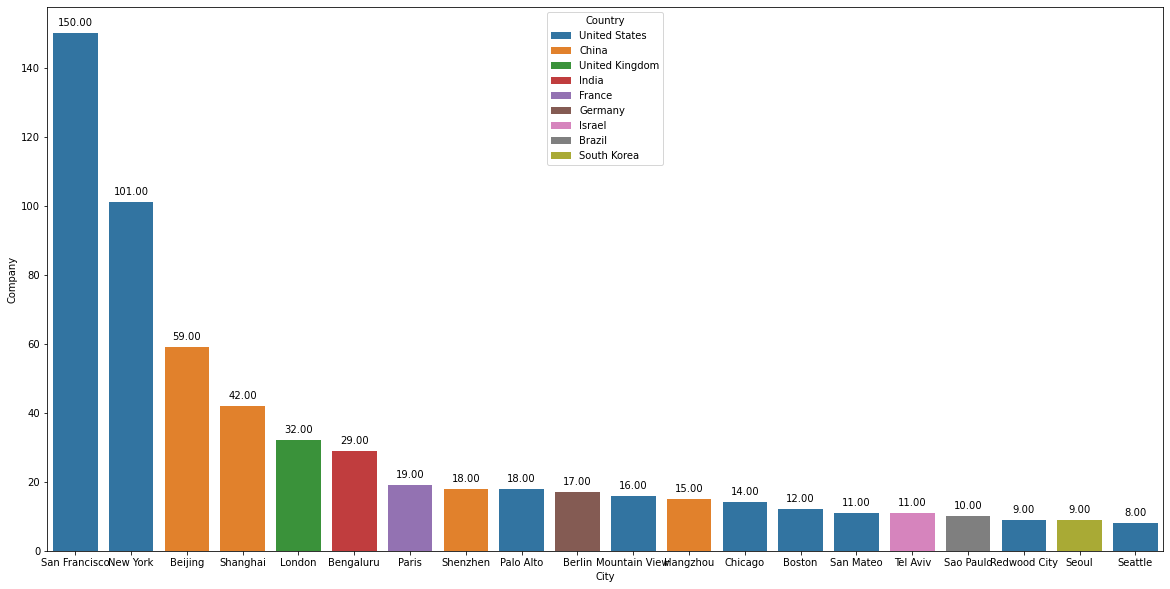

In [53]:
plt.figure(figsize=(20,10))
splot=sns.barplot(x='City',y='Company',data=top_20,hue='Country',orient="v",dodge=False,capsize=0.1)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


### Which investors have funded the most unicorns?

In [34]:
###
g0=pd.DataFrame(uc_comp[0].value_counts())

g1=pd.DataFrame(uc_comp[1].value_counts())
g2=pd.DataFrame(uc_comp[2].value_counts())
g3=pd.DataFrame(uc_comp[3].value_counts())

In [35]:
g=pd.concat([g0,g1,g2,g3,],axis=0)

In [36]:
g=g.fillna(0)

In [37]:
g['Total_investment']=g[0]+g[1]+g[2]+g[3]

In [38]:
g=g.reset_index()

In [42]:
s=g.groupby(by='index')['Total_investment'].sum().sort_values(ascending=False).reset_index().head(10)

In [43]:
s

,index,Total_investment
0,Tiger Global Management,35.0
1,Accel,32.0
2,Sequoia Capital,30.0
3,Sequoia Capital China,30.0
4,Andreessen Horowitz,29.0
5,Accel,28.0
6,Insight Partners,23.0
7,Andreessen Horowitz,23.0
8,General Catalyst,23.0
9,Insight Partners,21.0


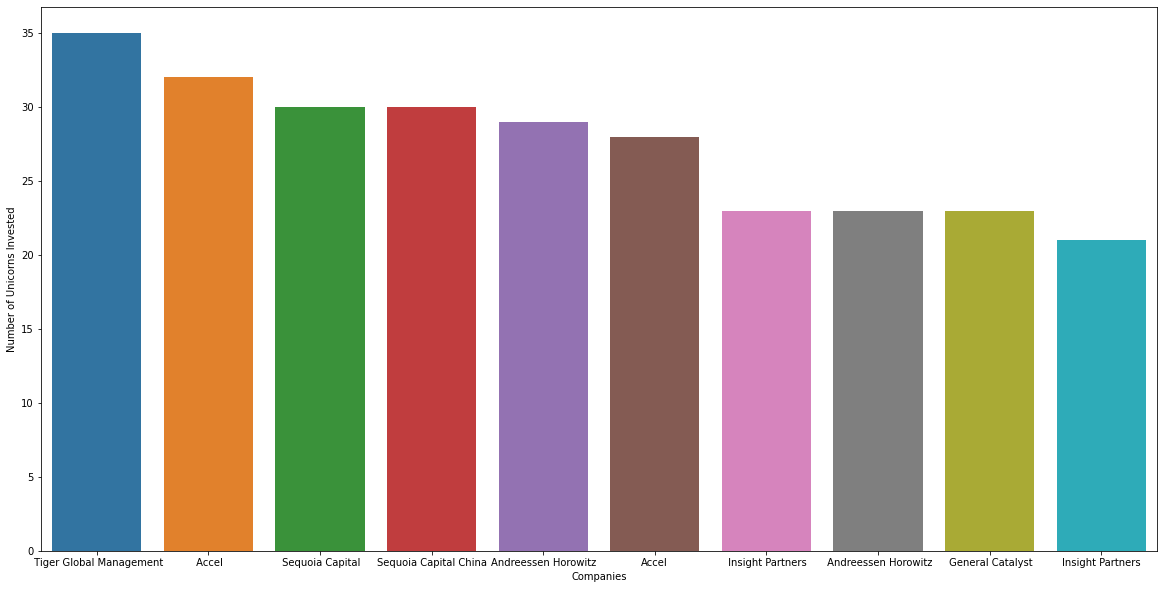

In [49]:

plt.figure(figsize=(20,10))
sns.barplot(x='index',y='Total_investment',data=s)
plt.xlabel("Companies")
plt.ylabel("Number of Unicorns Invested")
plt.show()